# Dagrecords

In de media zien we steeds vaker informatie over dagrecords terugkomen.

Bv. 18 juni 2022 is de warmste ooit!

Een dagrecord op zichzelf zegt natuurlijk niets. Maar het kan wel interessant worden om het grotere geheel te bekijken...

## Initialiseren

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd   
from openkmi.point_obs import Synop
import datetime
import seaborn as sns

plt.rcParams['font.family'] = 'MonoSpace'
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
kmi = Synop()

In [3]:
df_stations = kmi.get_stations()
df_stations

,code,the_geom,altitude,name,date_begin,date_end
0,6459,POINT (50.581913 4.689214),159.2,ERNAGE,2002-05-22T00:00:00,NaN
1,6451,POINT (50.896391 4.526765),58.0,ZAVENTEM/MELSBROEK,1952-01-01T00:00:00,NaN
2,6449,POINT (50.454432 4.442053),192.0,GOSSELIES,1962-01-01T00:00:00,NaN
3,6450,POINT (51.191399 4.451755),14.0,DEURNE,1952-01-01T00:00:00,NaN
4,6464,POINT (51.221395 5.027247),21.5,RETIE,2002-02-14T01:00:00,NaN
5,6472,POINT (50.193663 5.255236),295.3,HUMAIN,2002-04-01T00:00:00,NaN
6,6494,POINT (50.510779 6.073438),673.2,MONT RIGI,2001-04-12T00:00:00,NaN
7,6484,POINT (49.620358 5.587229),323.9,BUZENOL,2003-04-03T06:00:00,NaN
8,6490,POINT (50.478615 5.909864),482.0,SPA (AERODROME),1952-01-01T00:00:00,NaN
9,6476,POINT (50.038875 5.403753),557.0,SAINT-HUBERT,1952-01-01T00:00:00,NaN


In [4]:
kmi.get_parameters()

{'code': 'int',
 'timestamp': 'dateTime',
 'precip_quantity': 'decimal',
 'precip_range': 'decimal',
 'temp': 'decimal',
 'temp_min': 'decimal',
 'temp_max': 'decimal',
 'temp_grass_min': 'decimal',
 'wind_speed': 'decimal',
 'wind_speed_unit': 'int',
 'wind_direction': 'decimal',
 'wind_peak_speed': 'decimal',
 'humidity_relative': 'decimal',
 'weather_current': 'int',
 'pressure': 'decimal',
 'pressure_station_level': 'decimal',
 'sun_duration_24hours': 'decimal',
 'short_wave_from_sky_24hours': 'decimal',
 'cloudiness': 'decimal'}

## Data verzamelen

We downloaden de maximale en minimale temperatuur voor Ukkel.

In [5]:
df_tmax = kmi.get_data('6447', parameter_list=['temp_max']).dropna()
df_tmin = kmi.get_data('6447', parameter_list=['temp_min']).dropna()

Vervolgens vormen we de data wat om zodat we ze eenvoudiger kunnen bewerken:

In [6]:
def get_pivot_tables(dft):
    c = dft.columns[0]
    dft['doy'] = dft.index.dayofyear
    dft['year'] = dft.index.year
    return dft.pivot(index='doy', columns='year', values=c)

In [7]:
dftmax = get_pivot_tables(df_tmax)
dftmin = get_pivot_tables(df_tmin)

Laten we de maximale temperatuur per dag eens plotten. De grijze lijnen geven de verschillende jaren weer.
De rode lijn is 2022.

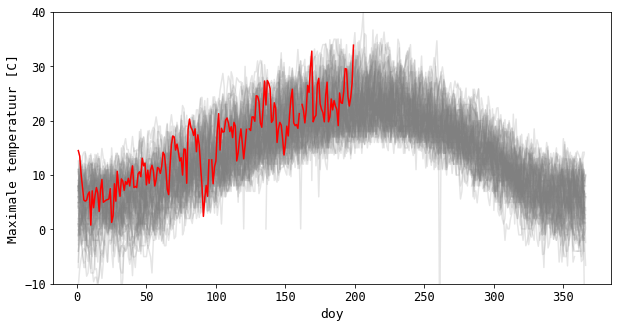

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
dftmax.plot(legend=False, color='grey', alpha=.2, ax=ax)
dftmax[2022].plot(ax=ax, color='red')
ax.set_ylim([-10,40])
ax.set_ylabel('Maximale temperatuur [C]');

## Analyse

Vervolgens berekenen we het max/min per dag alsook het jaar waarop dit voorkwam.

In [9]:
# Zoek de maxima / minima en het overeenkomstige jaar in de tijdreeks
dftmax['max'] = dftmax.max(axis=1)
dftmax['maxyear'] = dftmax.idxmax(axis=1)
dftmin['min'] = dftmin.min(axis=1)
dftmin['minyear'] = dftmin.idxmin(axis=1)

In [10]:
dftmax.head()

year,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2015,2016,2017,2018,2019,2020,2021,2022,max,maxyear
doy,,,,,,,,,,,,,,,,,,,,,
1,6.0,3.0,1.0,1.0,7.0,5.0,8.0,8.0,11.0,4.0,...,4.9,7.2,-1.0,7.2,7.9,5.7,4.3,14.5,14.5,2022
2,10.0,2.0,-1.0,-1.0,6.0,5.0,2.0,5.0,9.0,7.0,...,9.0,11.1,0.7,6.7,6.2,5.6,3.4,13.5,13.5,2022
3,4.0,0.1,2.0,-0.1,5.0,7.0,2.0,5.0,8.0,6.0,...,4.6,7.2,2.3,9.7,5.2,9.6,3.3,10.2,12.7,2014
4,5.0,-0.1,1.0,-0.1,5.0,11.0,3.0,2.0,10.0,5.0,...,4.3,7.6,7.0,11.9,4.4,7.5,2.2,7.7,13.5,1999
5,6.0,-1.0,-0.1,-0.1,8.0,NaN,8.0,3.0,11.0,5.0,...,5.2,7.3,4.6,9.5,5.8,7.1,2.5,5.4,14.2,1999


Deze informatie kunnen we vervolgens plotten.
In onderstaande plotten we het aantal dagrecords per jaar.
De lijn geeft het resultaat van een lineair regressiemodel weer.

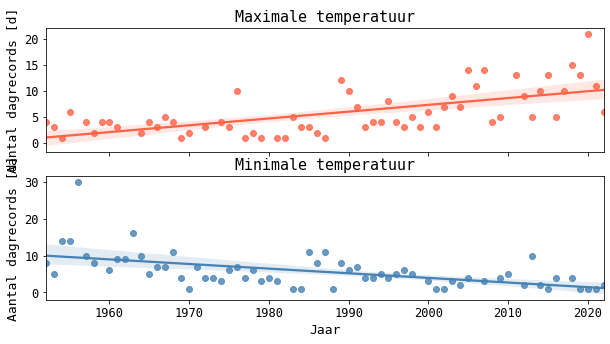

In [11]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,5))
sns.regplot(data=dftmax.groupby('maxyear').count()['max'].reset_index(), x='maxyear', y='max', ax=ax[0], color='tomato')
sns.regplot(data=dftmin.groupby('minyear').count()['min'].reset_index(), x='minyear', y='min', ax=ax[1], color='steelblue')
ax[0].set_title('Maximale temperatuur')
ax[1].set_title('Minimale temperatuur')
ax[0].set_ylabel('Aantal dagrecords [d]')
ax[1].set_ylabel('Aantal dagrecords [d]')
ax[0].set_xlabel('')
ax[1].set_xlabel('Jaar');

Bovenstaande plot is al vrij duidelijk!
De helling van de regressielijn geeft aan dat het aantal dagrecords per jaar toeneemt voor de maximale temperatuur en het aantal dagrecords per jaar afneemt voor de minimale temperatuur.

Concreet: In de meest recente jaren worden dus veel meer dagrecords voor maximale temperatuur gebroken dan in het begin van de beschikbare metingen maar steeds minder dagrecords voor de minimale temperatuur.

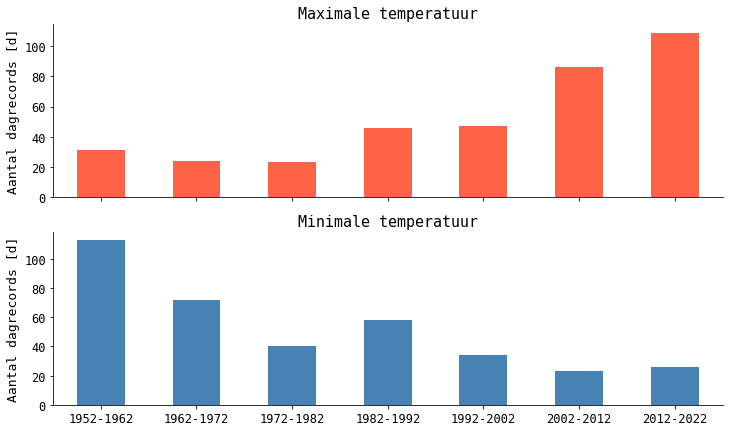

In [15]:
plt.rcParams['font.family'] = 'Monospace'
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12,7))
pd.cut(dftmax['maxyear'], bins=7, precision=0).value_counts().sort_index().plot.bar(ax=ax[0], color='tomato')
pd.cut(dftmin['minyear'], bins=7, precision=0).value_counts().sort_index().plot.bar(ax=ax[1], color='steelblue')
ax[0].set_title('Maximale temperatuur')
ax[1].set_title('Minimale temperatuur')
ax[0].set_ylabel('Aantal dagrecords [d]')
ax[1].set_ylabel('Aantal dagrecords [d]')
ax[1].set_xticklabels([f"{a.get_text().split(',')[0][1:-2]}-{a.get_text().split(',')[1][1:-3]}" for a in ax[1].get_xticklabels()], rotation=0)
for x in ax:
    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    
plt.savefig('dagrecords.png', facecolor='w', transparent=False)